<a href="https://www.kaggle.com/code/mohamedelgazar74/logistic-regression-from-scratch?scriptVersionId=240784450" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Logistic Regression From Scratch

# 📦 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 📥 Load the dataset


In [2]:
data = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")

In [3]:
print("Number of rows is = ", data.shape[0], " \nNumber of columns is = " , data.shape[1]) 

Number of rows is =  400  
Number of columns is =  5


In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Data Overview

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

Descriptive Statistics:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.00000

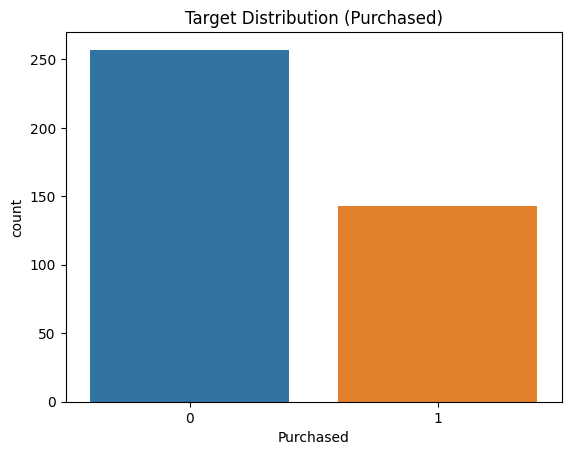

In [5]:
print("Dataset Info:")
print(data.info())

print("\nDescriptive Statistics:")
print(data.describe())

print("\nTarget Distribution:")
print(data['Purchased'].value_counts())

sns.countplot(data=data, x='Purchased')
plt.title("Target Distribution (Purchased)")
plt.show()

In [6]:
data.drop(columns=['User ID']).describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Age,400.000000,37.655000,10.482877,18.000000,29.750000,37.000000,46.000000,60.000000
EstimatedSalary,400.000000,69742.500000,34096.960282,15000.000000,43000.000000,70000.000000,88000.000000,150000.000000
Purchased,400.000000,0.357500,0.479864,0.000000,0.000000,0.000000,1.000000,1.000000


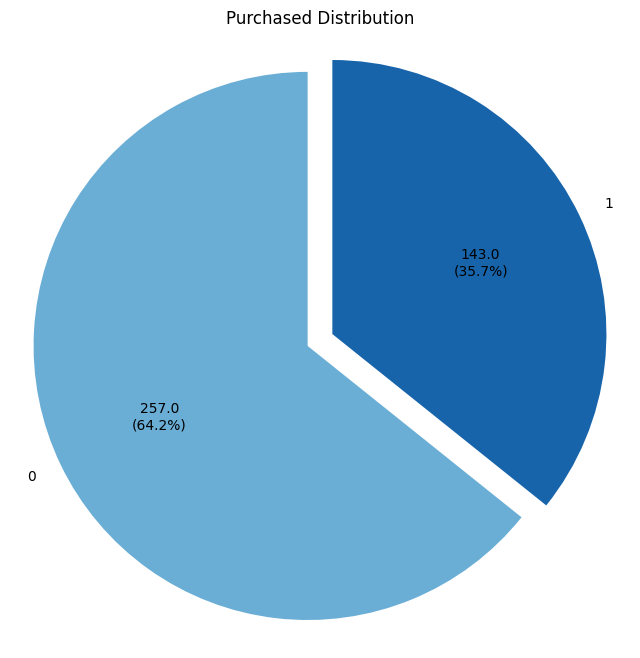

In [7]:
purchase_counts = data["Purchased"].value_counts()

explode = [0.05] * len(purchase_counts)

def func(pct, allvals):
    absolute = round(pct / 100.*np.sum(allvals), 0)
    return f"{absolute}\n({pct:.1f}%)"

plt.figure(figsize=(8, 8))
plt.pie(
    purchase_counts, 
    labels=purchase_counts.index, 
    autopct=lambda pct: func(pct, purchase_counts), 
    startangle=90, 
    colors=plt.cm.Blues([0.5, 0.8]),
    explode=explode
)
plt.title("Purchased Distribution")
plt.axis('equal')  
plt.show()

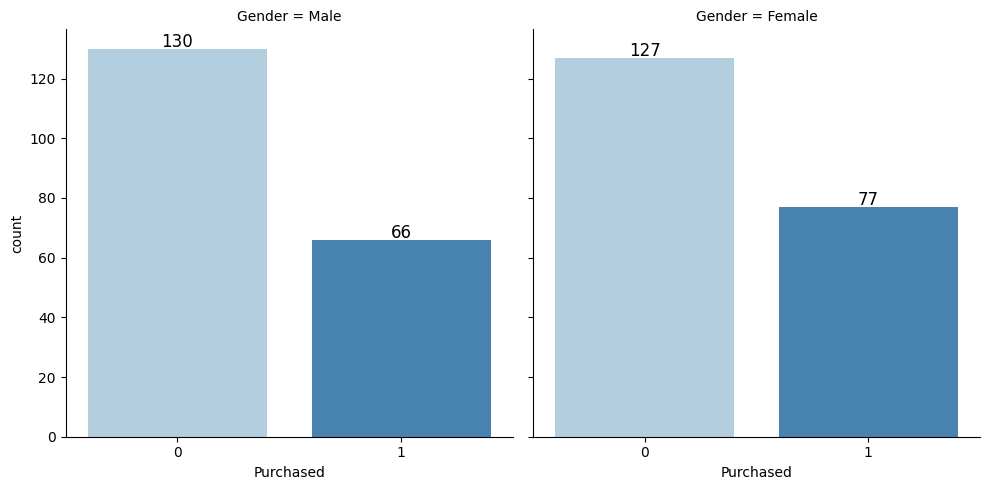

In [8]:
g = sns.catplot(x='Purchased', col='Gender', kind='count', data=data, palette="Blues")
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')
plt.show()

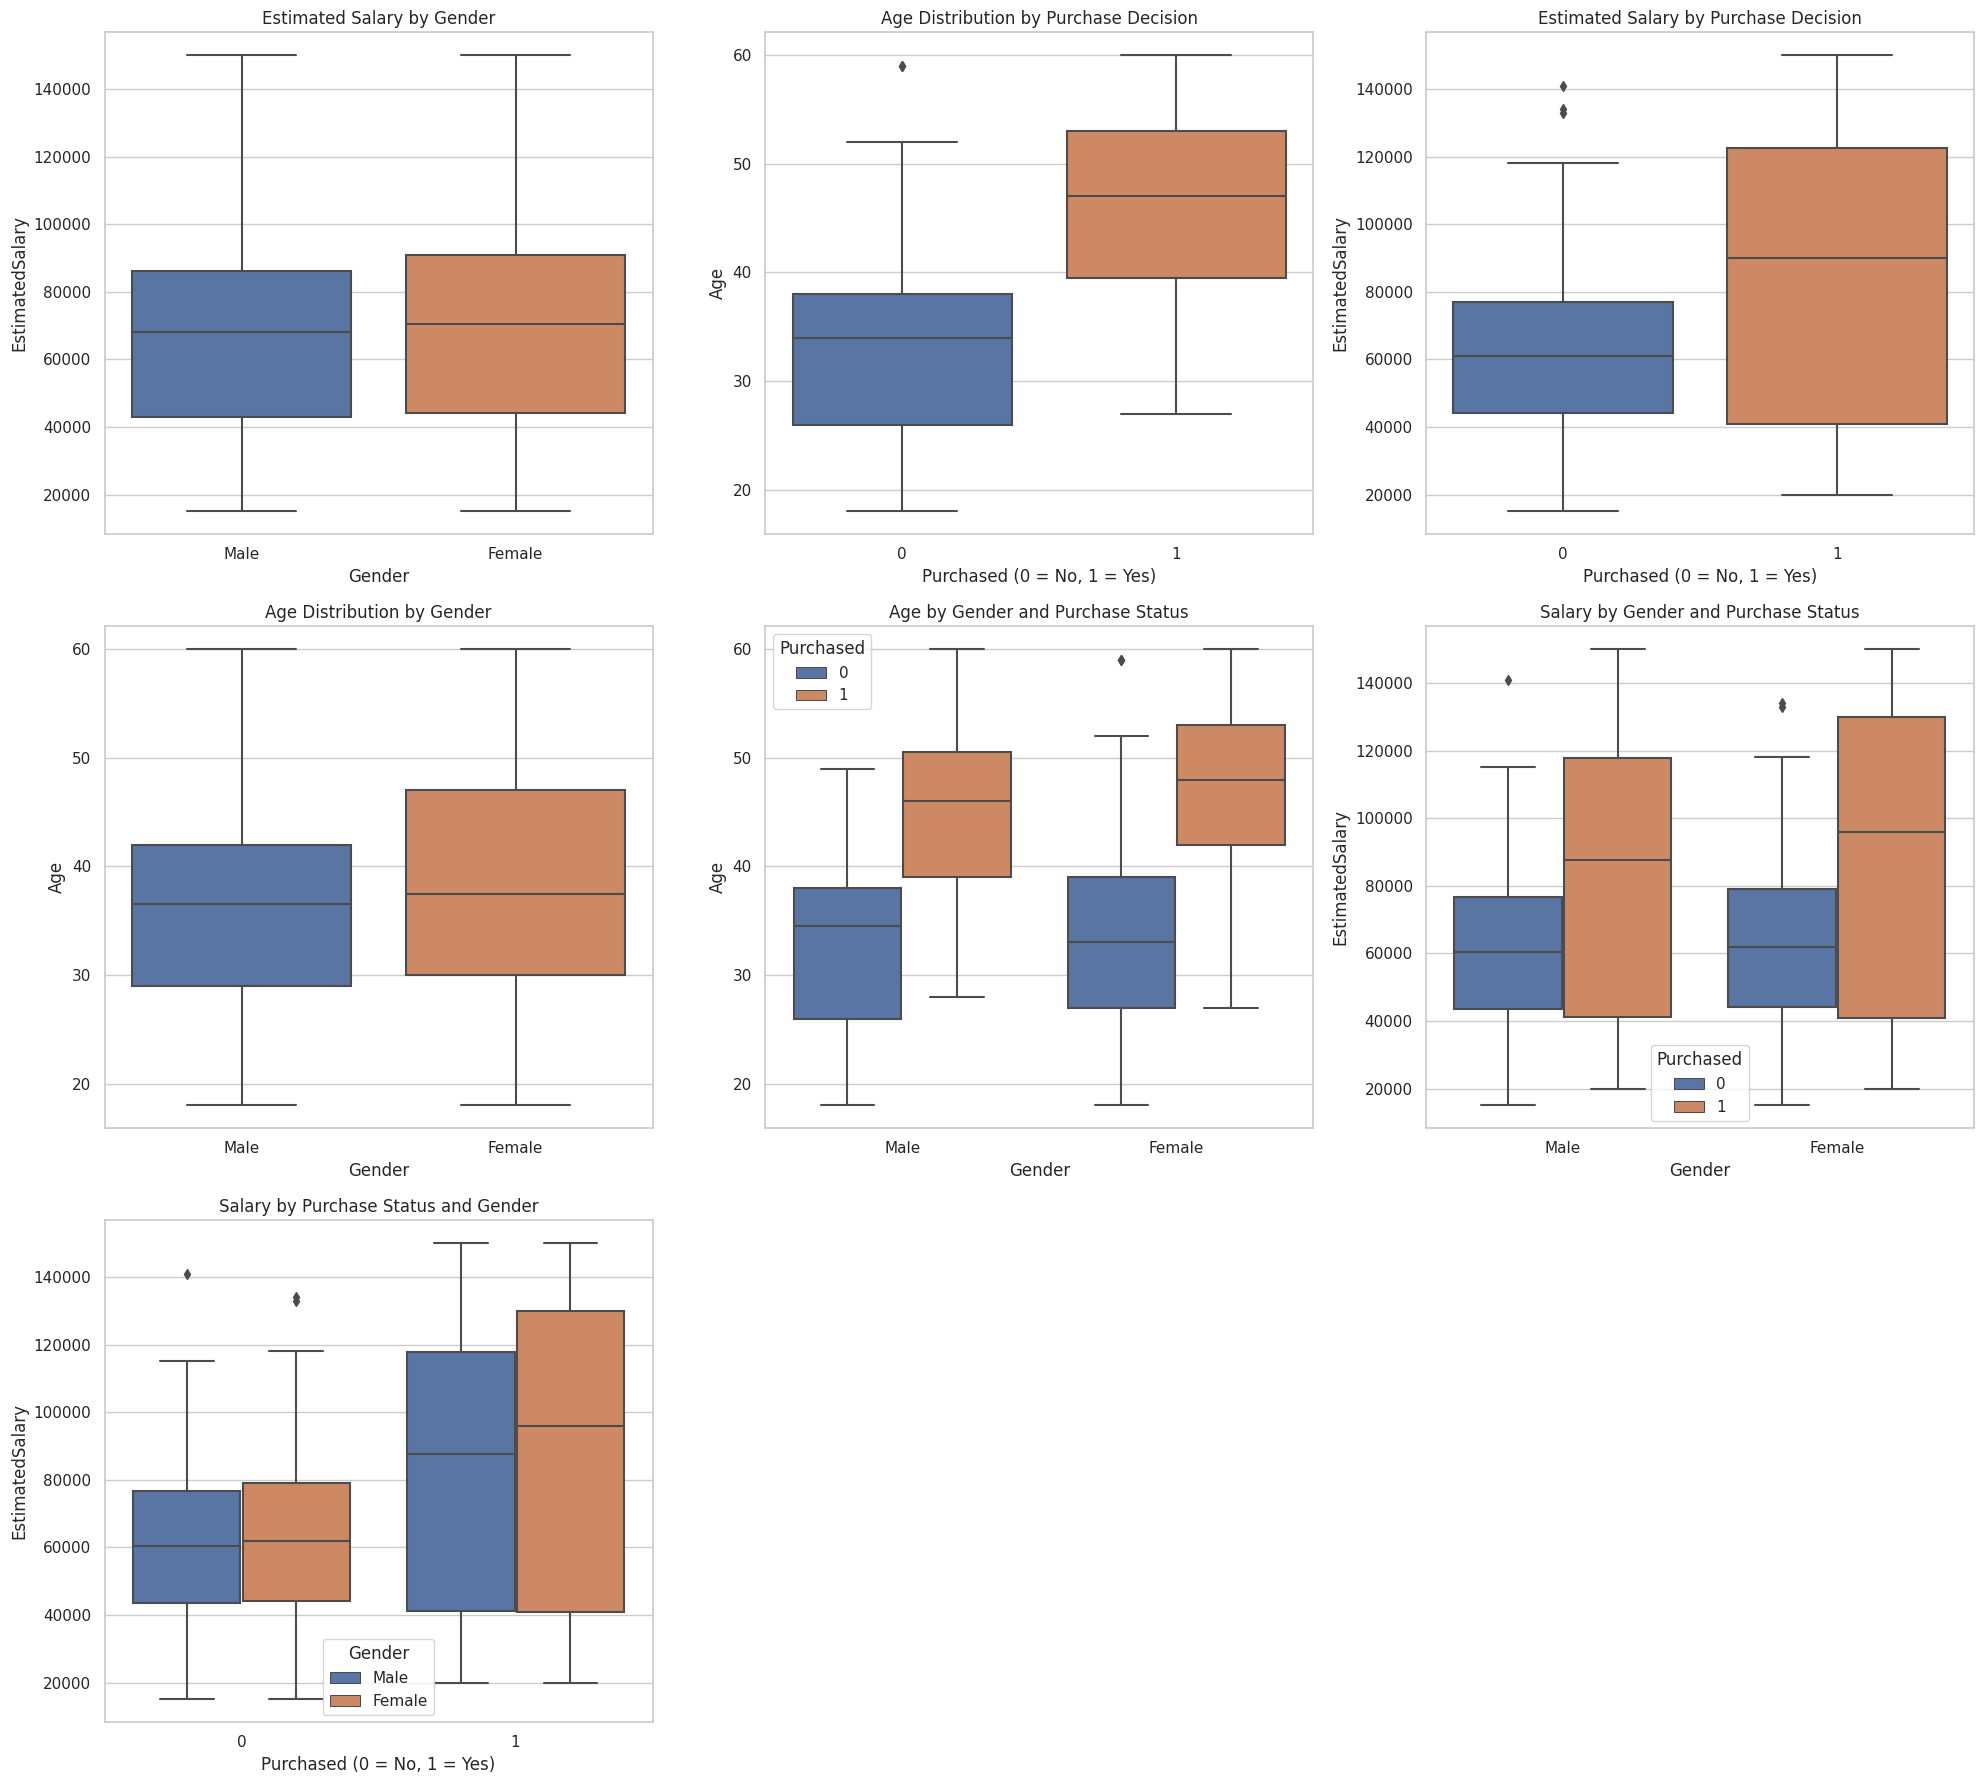

In [9]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
axes = axes.flatten() 

# 1. Estimated Salary by Gender
sns.boxplot(data=data, x='Gender', y='EstimatedSalary', ax=axes[0])
axes[0].set_title('Estimated Salary by Gender')

# 2. Age Distribution by Purchase Decision
sns.boxplot(data=data, x='Purchased', y='Age', ax=axes[1])
axes[1].set_title('Age Distribution by Purchase Decision')
axes[1].set_xlabel('Purchased (0 = No, 1 = Yes)')

# 3. Estimated Salary Distribution by Purchase Decision
sns.boxplot(data=data, x='Purchased', y='EstimatedSalary', ax=axes[2])
axes[2].set_title('Estimated Salary by Purchase Decision')
axes[2].set_xlabel('Purchased (0 = No, 1 = Yes)')

# 4. Age Distribution by Gender
sns.boxplot(data=data, x='Gender', y='Age', ax=axes[3])
axes[3].set_title('Age Distribution by Gender')

# 5. Age by Gender and Purchase Status
sns.boxplot(data=data, x='Gender', y='Age', hue='Purchased', ax=axes[4])
axes[4].set_title('Age by Gender and Purchase Status')
axes[4].legend(title='Purchased')

# 6. Estimated Salary by Gender and Purchase Status
sns.boxplot(data=data, x='Gender', y='EstimatedSalary', hue='Purchased', ax=axes[5])
axes[5].set_title('Salary by Gender and Purchase Status')
axes[5].legend(title='Purchased')

# 7. Estimated Salary by Purchase and Gender
sns.boxplot(data=data, x='Purchased', y='EstimatedSalary', hue='Gender', ax=axes[6])
axes[6].set_title('Salary by Purchase Status and Gender')
axes[6].set_xlabel('Purchased (0 = No, 1 = Yes)')
axes[6].legend(title='Gender')

for i in range(7, 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

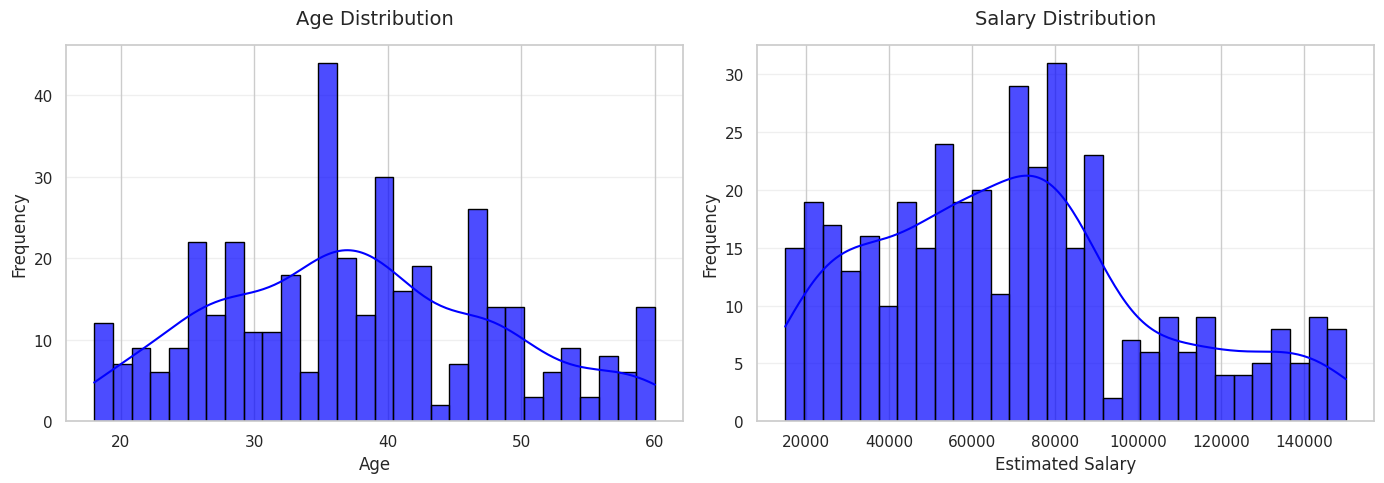

In [10]:
plt.figure(figsize=(14, 5))  # Wider figure to accommodate two plots

# First subplot - Age distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
sns.histplot(data['Age'], kde=True, color='Blue', bins=30, edgecolor='black', alpha=0.7)
plt.title('Age Distribution', fontsize=14, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Second subplot - Salary distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.histplot(data['EstimatedSalary'], kde=True, color='Blue', bins=30, edgecolor='black', alpha=0.7)
plt.title('Salary Distribution', fontsize=14, pad=15)
plt.xlabel('Estimated Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

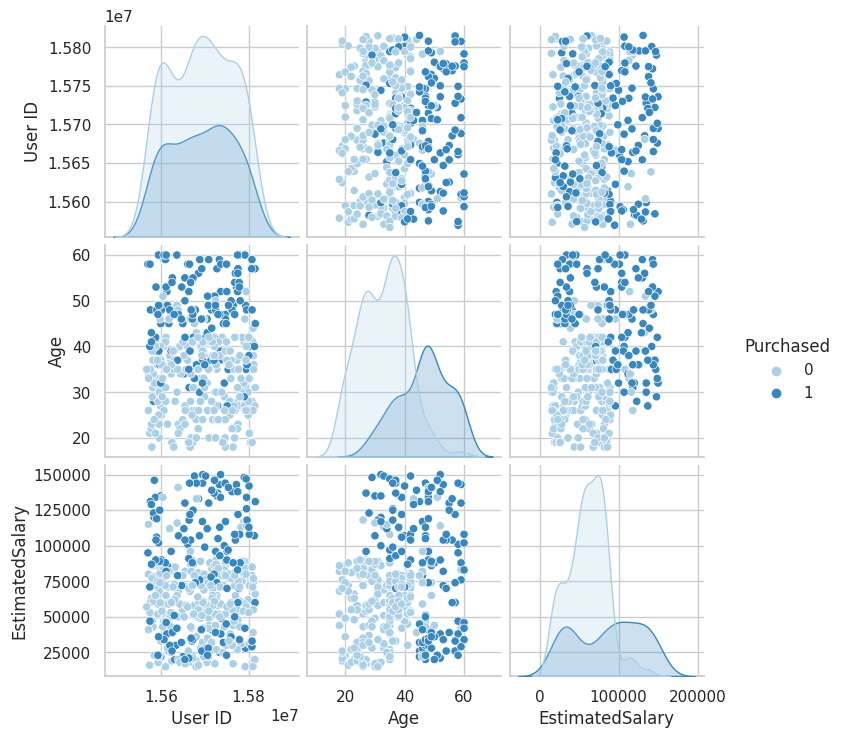

In [11]:
sns.pairplot(data , hue = 'Purchased',palette='Blues')
plt.show()

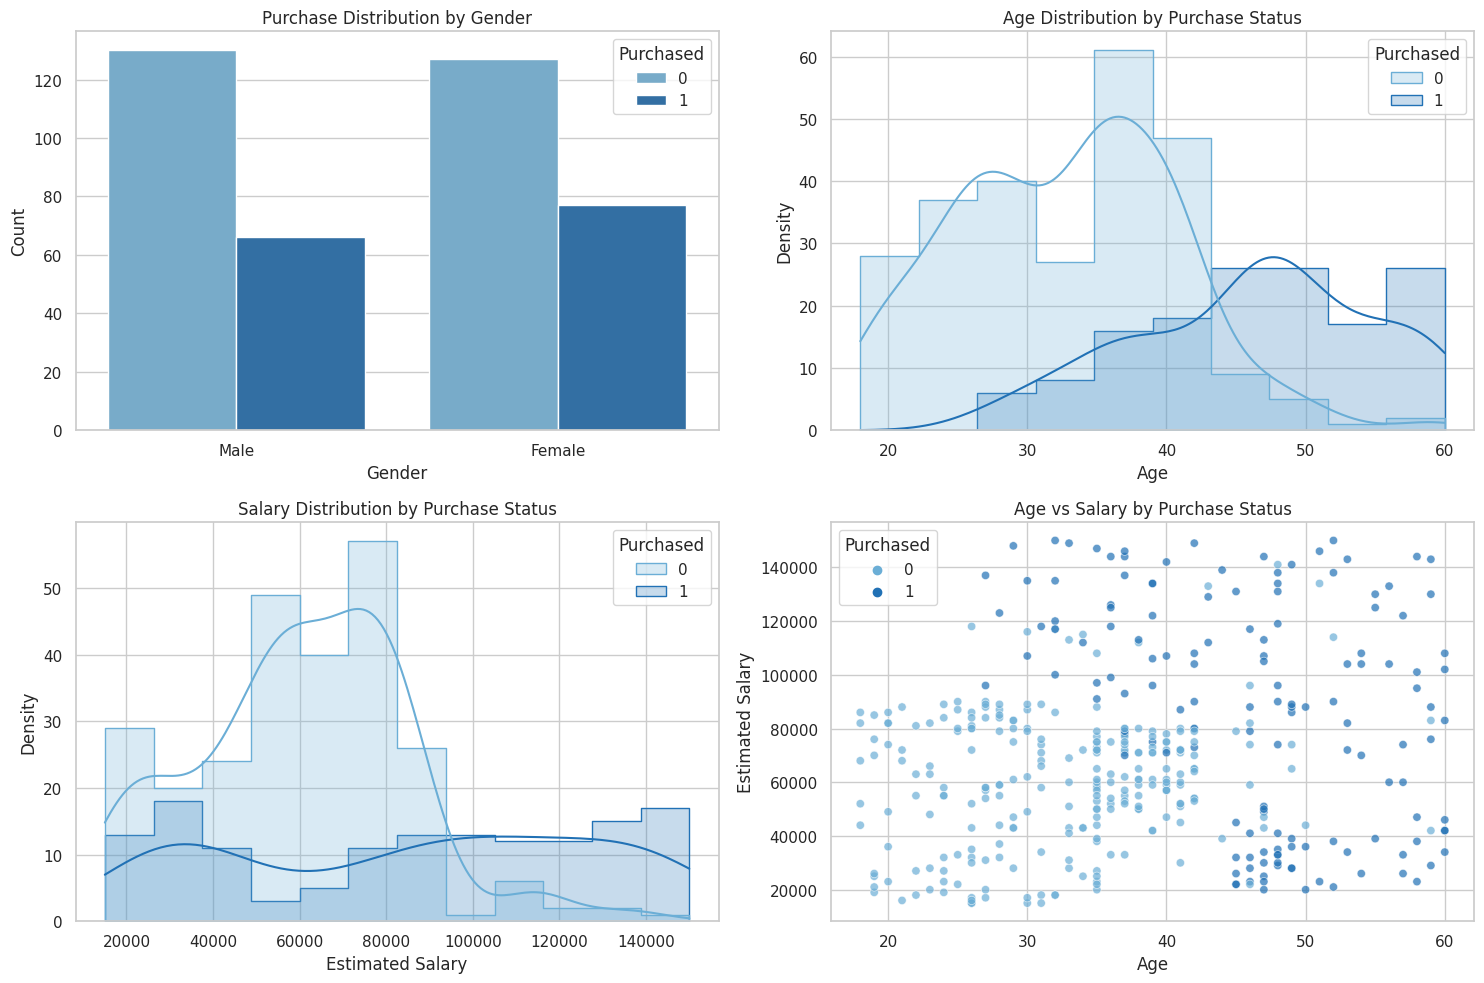

In [12]:
blue_palette = ['#6baed6', '#2171b5']

plt.figure(figsize=(15, 10))

# 1. Distribution of Purchases by Gender
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', hue='Purchased', data=data, palette=blue_palette)
plt.title('Purchase Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# 2. Age distribution by Purchase status
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='Age', hue='Purchased', element='step', kde=True, palette=blue_palette)
plt.title('Age Distribution by Purchase Status')
plt.xlabel('Age')
plt.ylabel('Density')

# 3. Salary distribution by Purchase status
plt.subplot(2, 2, 3)
sns.histplot(data=data, x='EstimatedSalary', hue='Purchased', element='step', kde=True, palette=blue_palette)
plt.title('Salary Distribution by Purchase Status')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')

# 4. Age vs Salary colored by Purchase status
plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='Age', y='EstimatedSalary', hue='Purchased', alpha=0.7, palette=blue_palette)
plt.title('Age vs Salary by Purchase Status')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.tight_layout()
plt.show()


# 📊 Correlation Analysis


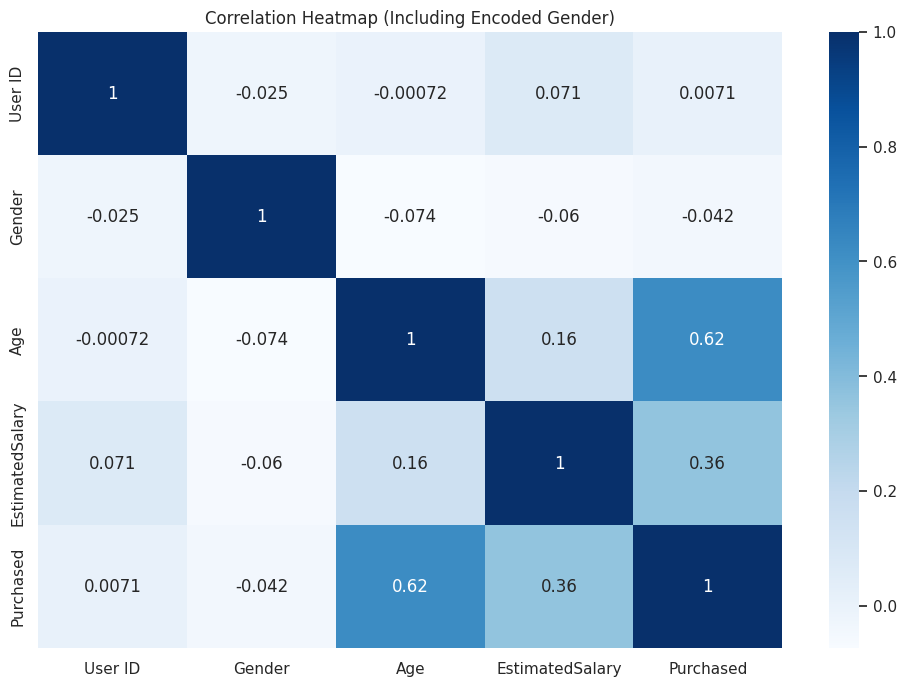

In [13]:
encoded_data = data.copy()
encoded_data['Gender'] = LabelEncoder().fit_transform(encoded_data['Gender'])  # Male=1, Female=0
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap (Including Encoded Gender)')
plt.show()

# 🧾 Feature/Target Separation and Scaling


In [14]:
data = data.drop(columns=["User ID"], errors='ignore')
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
X = data.drop(columns=["Purchased"])
y = data["Purchased"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# 🧪 Train/Test Split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🏗️ Logistic Regression from Scratch (Class Definition)


In [16]:
class MyLogisticRegression:
    def __init__(self, lr=0.01, epochs=1000, method='batch', l2=0.0):
        self.lr = lr
        self.epochs = epochs
        self.method = method
        self.l2 = l2

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.zeros(X.shape[1])
        m = len(y)

        for epoch in range(self.epochs):
            if self.method == 'sgd':
                for i in range(m):
                    xi = X[i:i+1]
                    yi = y.iloc[i]

                    pred = self.sigmoid(np.dot(xi, self.weights))
                    grad = (pred - yi) * xi.flatten() + self.l2 * self.weights
                    self.weights -= self.lr * grad
            else:
                pred = self.sigmoid(np.dot(X, self.weights))
                grad = np.dot(X.T, (pred - y)) / m + self.l2 * self.weights
                self.weights -= self.lr * grad

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return (self.sigmoid(np.dot(X, self.weights)) >= 0.5).astype(int)


# 🧪 Logistic Regression Hyperparameter Tuning Results


In [17]:
results = {}
best_per_method = {}

learning_rates = [0.001, 0.01, 0.1]
epochs_list = [1000, 2000, 3000, 5000]
l2_values = [0, 0.001, 0.01, 0.1]

for method in ["batch", "sgd", "ridge"]:
    method_results = {}
    
    for lr in learning_rates:
        for epochs in epochs_list:
            for l2 in l2_values if method in ["batch", "ridge"] else [0]:
                model = MyLogisticRegression(
                    method="batch" if method == "ridge" else method,
                    lr=lr,
                    epochs=epochs,
                    l2=l2 if method in ["batch", "ridge"] else 0
                )

                model.fit(X_train, y_train)
                preds = model.predict(X_test)
                acc = accuracy_score(y_test, preds)

                key = f"{method.upper()} | lr={lr} | epochs={epochs} | l2={l2}"
                method_results[key] = acc
                results[key] = acc
                print(f"{key} --> Accuracy: {acc}")
    
    best_key = max(method_results, key=method_results.get)
    best_per_method[method] = (best_key, method_results[best_key])
    print(f"\n✅ Best {method.upper()} setting: {best_key} --> Accuracy: {method_results[best_key]}\n")

overall_best_key = max(results, key=results.get)
print("🏆 Overall Best Setting:")
print(overall_best_key, "with accuracy:", results[overall_best_key])


BATCH | lr=0.001 | epochs=1000 | l2=0 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=1000 | l2=0.001 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=1000 | l2=0.01 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=1000 | l2=0.1 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=2000 | l2=0 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=2000 | l2=0.001 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=2000 | l2=0.01 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=2000 | l2=0.1 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=3000 | l2=0 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=3000 | l2=0.001 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=3000 | l2=0.01 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=3000 | l2=0.1 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=5000 | l2=0 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=5000 | l2=0.001 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=5000 | l2=0.01 --> Accuracy: 0.8625
BATCH | lr=0.001 | epochs=5000 | l2=0.1 --> Accuracy: 0.8625
BATCH | lr=0.01 | ep

# 🏋️ Train Models with Different Gradient Descent Approaches


In [18]:
results = {}

models = {
    "Batch GD": MyLogisticRegression(method="batch", lr=0.1, epochs=3000),
    "SGD": MyLogisticRegression(method="sgd", lr=0.1, epochs=1000),
    "Ridge": MyLogisticRegression(method="batch", lr=0.01, epochs=3000, l2=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy:", acc)
    print(classification_report(y_test, preds))
    print("#"*50)


Batch GD Accuracy: 0.8875
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

##################################################
SGD Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        52
           1       0.92      0.79      0.85        28

    accuracy                           0.90        80
   macro avg       0.90      0.87      0.89        80
weighted avg       0.90      0.90      0.90        80

##################################################
Ridge Accuracy: 0.8875
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy 

# ⚙️ Train scikit-learn Logistic Regression Model


In [19]:
params = {
    'C': [0.01, 0.1, 1, 10]
}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=params, cv=2)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
preds_sklearn = best_model.predict(X_test)
acc = accuracy_score(y_test, preds_sklearn)
results['Sklearn_Model'] = acc

print("Best Parameters:", grid.best_params_)
print("Accuracy:", acc)
print(classification_report(y_test, preds_sklearn))


Best Parameters: {'C': 10}
Accuracy: 0.8875
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



# 📉 Plot Accuracy Comparison


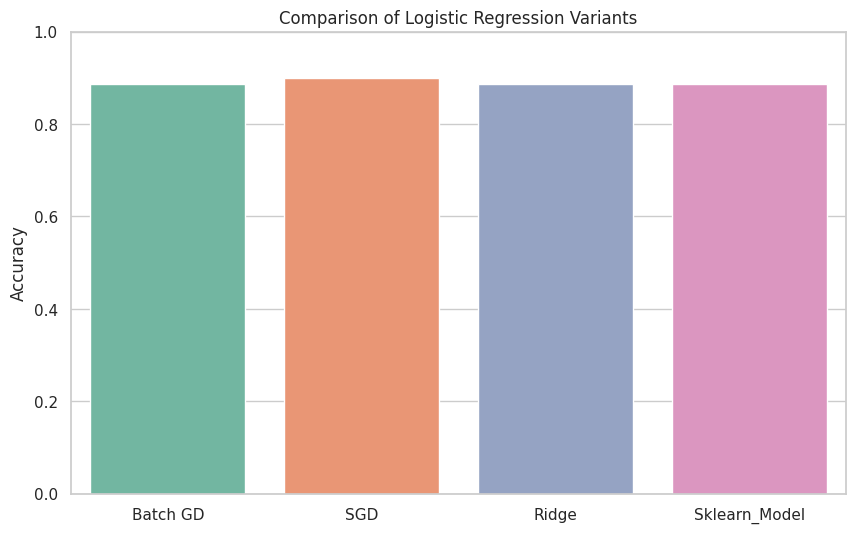

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set2")
plt.ylabel("Accuracy")
plt.title("Comparison of Logistic Regression Variants")
plt.ylim(0,1)
plt.show()

# Confusion Matrix and Precision-Recall Curve Plots


In [21]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

def plot_precision_recall(y_true, y_scores, title):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f"{title} - PR AUC: {pr_auc:.2f}")
    plt.grid(True)
    plt.show()


# Model Evaluation: Predictions and Performance Visualization

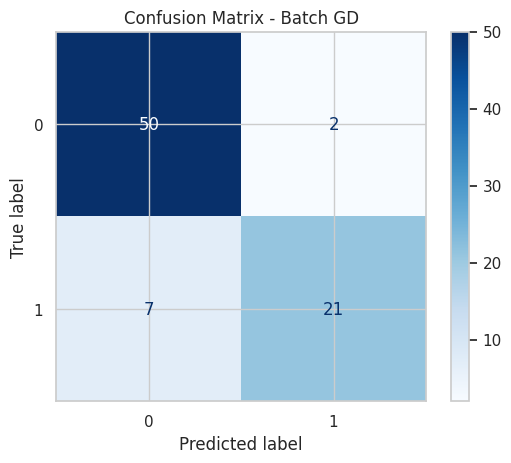

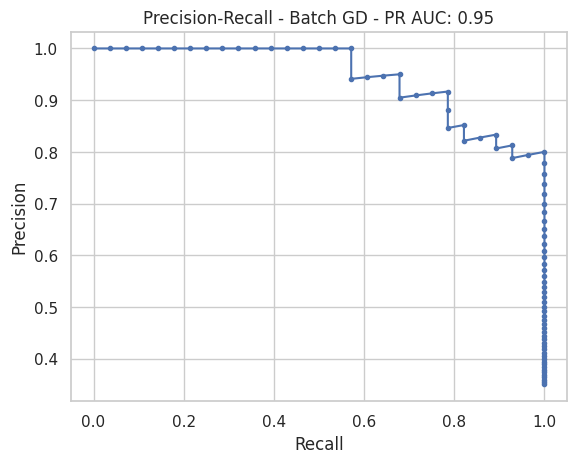

######################################################################


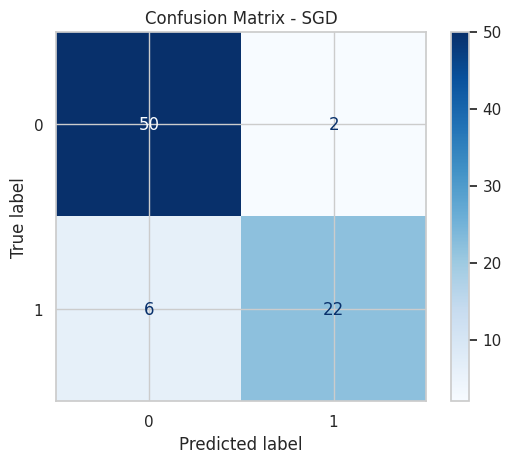

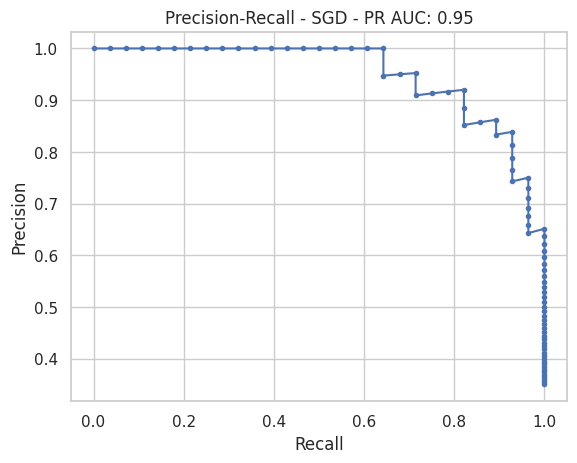

######################################################################


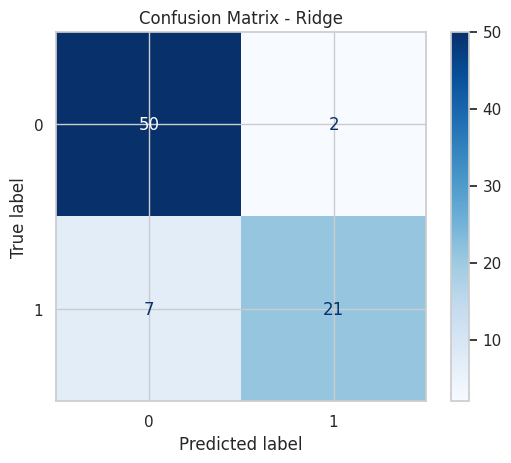

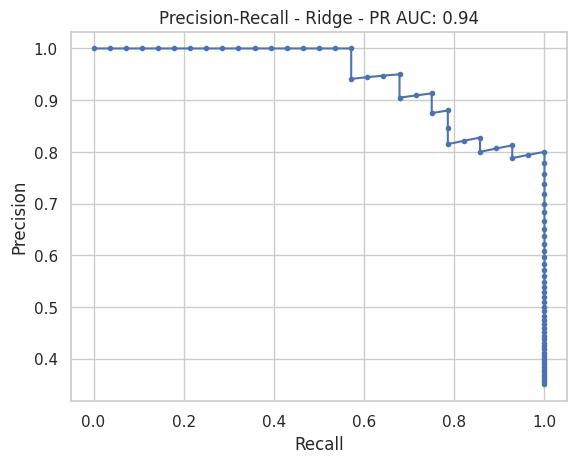

######################################################################


In [22]:

for name, model in models.items():
    preds = model.predict(X_test)
    scores = model.sigmoid(np.insert(X_test, 0, 1, axis=1) @ model.weights)
    plot_conf_matrix(y_test, preds, f"Confusion Matrix - {name}")
    plot_precision_recall(y_test, scores, f"Precision-Recall - {name}")
    print("#"*70)

# Sklearn Model Evaluation: Confusion Matrix and Precision-Recall Curve

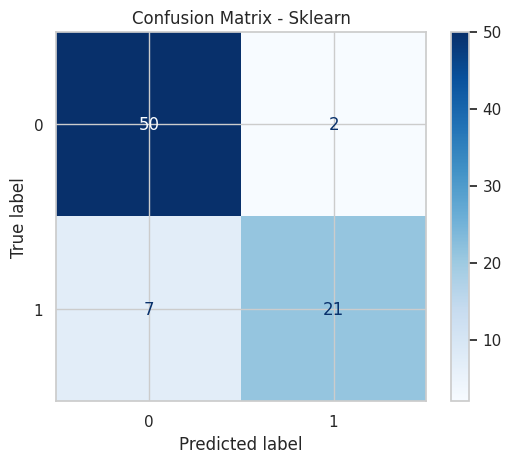

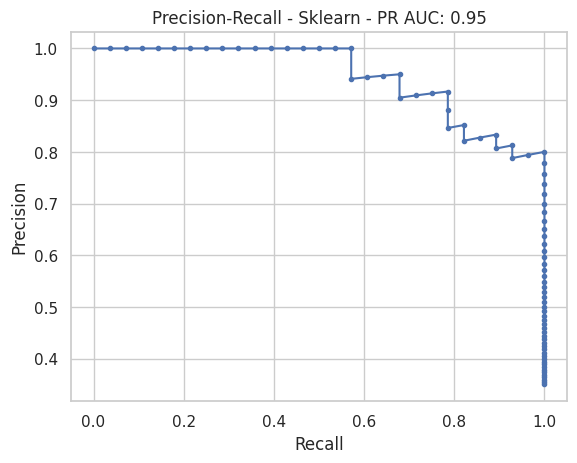

In [23]:
plot_conf_matrix(y_test, preds_sklearn, "Confusion Matrix - Sklearn")
scores_sklearn = best_model.predict_proba(X_test)[:, 1]
plot_precision_recall(y_test, scores_sklearn, "Precision-Recall - Sklearn")
